## Исследование вынужденной регулярной прецессии гироскопа

### Введение

**Цель**: исследовать вынужденную прецессию гироскопа, установить зависимость скорости вынужденной прецессии от величины момента сил, действующий на ось гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии.

**Оборудование**: гироскоп в кардановом подвесе, секундомер, набор грузов, отдельный ротор гироскопа, цилиндр известной массы, крутильный маятник, штангенциркуль, линейка.

#### Теория

В этой работе исследуется зависимость скорости прецессии гироскопа от момента силы, приложенной к его оси. Для этого к оси гироскопа подвешиваются грузы. Скорость прецессии определяется по числу оборотов рычага вокруг вертикальной оси и времени, которое на это ушло (измеряется секундомером). В процессе измерений рычаг не только поворачивается в результате прецессии гироскопа, но и опускается. Поэтому перед каждым измерением мы приподнимаем его на 5-6 градусов.

Гироскоп:

<img src="image_1.png" alt="Гироскоп" style="width:600px">

Измерение скорости прецессии гироскопа позволяет вычислить угловую скорость вращения его ротора. Расчет производится по формуле:

$$
\Omega = \frac{mgl}{I_z\omega_0}
$$

где $m$ — масса груза, $l$ — расстояние от центра карданова подвеса до точки крепления груза на оси гироскопа, $I_z$ — момент инерции гироскопа по его главной оси вращения. $\omega_0$ — частота его вращения относительно главной оси, $\Omega$ — частота прецессии.

Момент инерции ротора относительно оси симметрии $I_0$ измеряется по крутильным колебаниям точной копии ротора, подвешиваемой вдоль оси симметрии на жёсткой проволоке. Период крутильных колебаний $T_0$ зависит от момента инерции $I_0$ и модуля кручения проволоки $f$:

$$
T_0 = 2\pi\sqrt{\frac{I_0}{f}}
$$

Чтобы исключить модуль кручения проволоки, вместо ротора гироскопа к той же проволоке подвешивают цилиндр правильной формы с известными размерами и массой, для которого легко можно вычислить момент инерции $I_\text{ц}$. Для определения момента инерции ротора гироскопа имеем:

$$
I_0 = I_\text{ц}\frac{T_0^2}{T_\text{ц}^2}
$$

где $T_\text{ц}$ — период крутильных колебаний цилиндра.

Скорость вращения ротора гироскопа можно определить и не прибегая к исследованию прецессии. У используемых в работе гироскопов статор имеет две обмотки необходимые для быстрой раскрутки гироскопа. В данной работе одну обмотку используют для раскрутки гироскопа, а вторую — для измерения числа оборотов ротора. Ротор электромотора всегда немного намагничен. Вращаясь, он наводит во второй обмотке переменную ЭДС индукции, частота которой равна частоте вращения ротора. Частоту этой ЭДС можно, в частности, измерить по фигурам Лиссажу, получаемым на экране осциллографа, если на один вход подать исследуемую ЭДС, а на другой — переменное напряжение с хорошо прокалиброванного генератора. При совпадении частот на эране получаем эллипс.

Схема экспериментальной установки:

<img src="image_3.png" alt="Схема экспериментальной установки" style="width:600px">

**Импорт данных и библиотек:**

### 1. Связь частоты прецессии с массой

Частота прецессии обратно пропорциональна периоду, так как изменение угла одинаково для всех измерений:
,
$$
\Omega = \dfrac{2\pi}{T}
$$

Построим зависимость частоты от массы:

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vadim\AppData\Local\Temp\ipykernel_33192\147586164.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
periods_df = pd.read_csv('periods_data.csv')


for col_name in periods_df.columns:
    if not is_numeric_dtype(periods_df[col_name]):
        periods_df[col_name] = periods_df[col_name].apply(lambda s: s.replace(',', '.')).astype(float)


periods_df['T'] = periods_df['T'].apply(lambda x: round(x, 3))

periods_df

,"Масса, г",Периоды,"Время, с",T
0,57,1,173.74,173.740
1,338,4,118.49,29.622
2,268,4,148.86,37.215
3,215,2,92.88,46.440
4,173,2,115.43,57.715
5,142,2,141.05,70.525
6,93,1,106.17,106.170
7,76,1,129.76,129.760
8,60,1,165.51,165.510


In [3]:
periods_df['Omega'] = 2 * np.pi / ((periods_df['Время, с'] / periods_df['Периоды']))

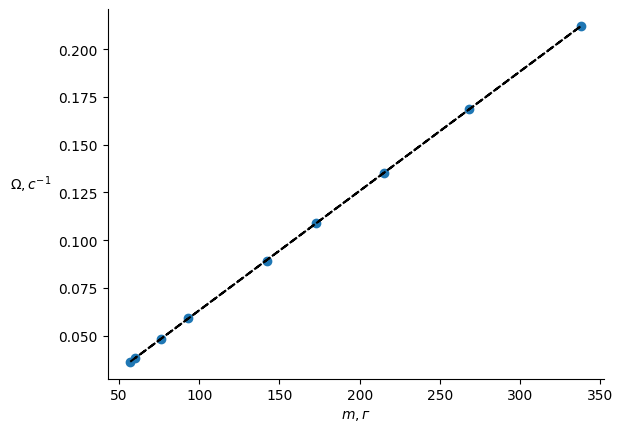

In [4]:
x = periods_df['Масса, г']
y = periods_df['Omega']

fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)

plt.scatter(x, y)

plt.plot(x, fit_fn(x), '--k')

plt.xlabel('$m, г$')
plt.ylabel('$\\Omega, с^{-1}$', rotation=0, labelpad=20)

k = fit[1] * 1000
sns.despine()
plt.show()

Погрешность рассчитываем по формуле (они довольно малы, поэтому не отображаем их на графике):

$$
\sigma_\Omega^\text{сист} = \Omega \varepsilon_T
$$

In [5]:
print(fit[1])

0.000566171332295813


In [6]:
periods_df

,"Масса, г",Периоды,"Время, с",T,Omega
0,57,1,173.74,173.740,0.036164
1,338,4,118.49,29.622,0.212109
2,268,4,148.86,37.215,0.168835
3,215,2,92.88,46.440,0.135297
4,173,2,115.43,57.715,0.108866
5,142,2,141.05,70.525,0.089092
6,93,1,106.17,106.170,0.059180
7,76,1,129.76,129.760,0.048422
8,60,1,165.51,165.510,0.037963


In [7]:
import math

def count_decimal_places(value):
    if value == 0:
        return 0
    return -int(math.floor(math.log10(abs(value)))) + 1

Поскольку каждый раз рычаг опускался на 18 граудсов что примерно равно $ \pi / 10$ рад, то найдем для каждой массы угловую скорость по формуле:  
$$ \omega = \frac{\pi / 10}{T} $$ 
А также момент силы по формуле (l = 121 мм): $$ M = mgl $$

In [8]:
periods_df['omega'] = (np.pi/10) / periods_df['Время, с']

In [9]:
omega = np.array([2487.22, 2462.13, 2476.10, 2465.76, 2471.45, 2472.38, 2480.25, 2460.22, 2487.91])

In [10]:
periods_df['omega'] = omega

In [11]:
periods_df['M'] = periods_df['Масса, г'] / 1000 * 9.8 * 0.121

In [12]:
periods_df

,"Масса, г",Периоды,"Время, с",T,Omega,omega,M
0,57,1,173.74,173.740,0.036164,2487.22,0.067591
1,338,4,118.49,29.622,0.212109,2462.13,0.400800
2,268,4,148.86,37.215,0.168835,2476.10,0.317794
3,215,2,92.88,46.440,0.135297,2465.76,0.254947
4,173,2,115.43,57.715,0.108866,2471.45,0.205143
5,142,2,141.05,70.525,0.089092,2472.38,0.168384
6,93,1,106.17,106.170,0.059180,2480.25,0.110279
7,76,1,129.76,129.760,0.048422,2460.22,0.090121
8,60,1,165.51,165.510,0.037963,2487.91,0.071148


### 2. Момент инерции ротора гироскопа 

Найдем $I_0$ ($T_0$= 3.933 c c и $T_ц$= 3.19 c):
$$ I_{ц} = \frac{1}{2}  m r^2 $$
$$ I_0 = I_\text{ц}\frac{T_0^2}{T_\text{ц}^2} $$

Погрешность момента инерции:

$\sigma_{I_0} = I_0\cdot\sqrt{\varepsilon_{I_\text{ц}}^2+ 4\varepsilon_{T_0}^2+ 4\varepsilon_{T_\text{ц}}^2 } \approx 0,03$ кг$\cdot \text{м}^2$

Итого, момент инерции ротора гироскопа:

$I_0 = (0,80\pm 0,03) 10^{-3}$ кг$\cdot \text{м}^2$

### 3. Определение частоты вращения ротора гироскопа:


Определить частоту вращения ротора можно по формуле:
$$ \omega_0 = \frac{1}{I_0 k} $$

где k - коэффициент наклона нашей прямой, т.е :

In [16]:
print(k)

omega_0 = 1 / (k*0.8*0.001)

0.5661713322958131


Получаем:
$$ \omega_0 = 2354.05 c^{-1} $$

Таким образом можно найти частоту вращения ротора:
$$ \nu = \frac{\omega_0}{2\pi} $$

In [ ]:
rotor_freq = 2354.052 / (2 * np.pi)
sigma_rotor_freq = 88.72 / (2 * np.pi)

In [ ]:
print(rotor_freq)
print(sigma_rotor_freq)

Итого имеем:
$$ \nu = 375 \pm 14 $$

С учетом сигмы это согласуется с частотой полученной с помощью осциллографа: $\nu = 400 $ Гц

###  Выводы
В данной работе была получена частота вращения ротора гироскопа:

Через прецессию гироскопа: $ \nu_1 = 374,66$  
Через фигуры Лиссажу: $ \nu_2 = 400 $ Гц

Сравнивая результаты приходим к выводу что при расчете первым способом на значения оказывает влияние погрешность в отличие от способа 2 где используются более точные приборы.

В работе была исследована вынужденная прецессия гироскопа, установлена зависимость скорости прецессии от момента сил действующих на ось гироскопа, и также были посчитаны частоты вращения двумя методами, а затем было проведено их сравнение с учетом погрешностей.

$$ K = \frac{I\omega^2}{2} $$

In [ ]:
K = 0.8 * 0.001 * np.power(omega_0,2) / 2

In [ ]:
K